In [1]:
import datasets
import utils
import gender

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms



In [2]:
data = "gender"
data_dir = "data/Gender01_RGB"
utils.split_train_to_val(data, data_dir)

In [3]:
c_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
])


In [7]:
dataset_train = datasets.GenderRGB(data_dir, "train", c_transform)
dataset_val = datasets.GenderRGB(data_dir, "val", c_transform)
dataset_test = datasets.GenderRGB(data_dir, "test", c_transform)

dataset_train_dataloader = DataLoader(dataset_train, batch_size=4, shuffle=True, num_workers=4)
dataset_val_dataloader = DataLoader(dataset_val, batch_size=4, shuffle=True, num_workers=4)
dataset_test_dataloader = DataLoader(dataset_test, batch_size=4, shuffle=True, num_workers=4)

In [8]:
print("Training dataset size: ", len(dataset_train))
print("Valication dataset size: ", len(dataset_val))
print("Testing dataset size: ", len(dataset_test))

Training dataset size:  124
Valication dataset size:  30
Testing dataset size:  93


Feature batch shape: 4


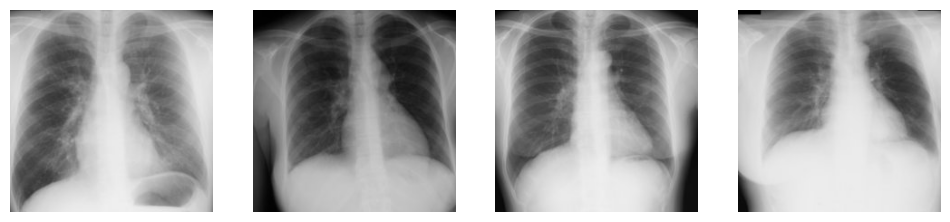

In [9]:
batch = list(iter(dataset_train_dataloader))[0]
batch_array = batch[0].permute(0, 2, 3, 1).numpy()
print(f"Feature batch shape: {batch_array.shape[0]}")
fig, axs = plt.subplots(1, batch_array.shape[0], figsize=(3*batch_array.shape[0],3))
for i in range(batch_array.shape[0]):
    axs[i].imshow(batch_array[i], cmap=plt.cm.bone)
    axs[i].axis('off')
plt.show()
